In [1]:
%matplotlib inline

In [2]:
import random
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from tkinter import *
from IPython.display import Image
from IPython.core.display import HTML 

<h1><center>Simulating and analyzing some of the most popular roulette strategies</center></h1>
<h2><center>Dilyan Yordanov Antonov</center></h2>

<h2><center><Font color="red">DISCLAIMER</Font></center></h2>
<h3><center><Font color="red">I DO NOT PROMOTE GAMBLING. THIS PROJECT IS FOR RESEARCH PURPOSES ONLY</Font>.</center></h3>


## ABSTRACT
**Casinos aren't stupid**. You probably have heard that the casino is always more likely to win than you. But do you know why exactly? I decided to prove this using the most famous casino game- roulette. In this project I have simulated and analysed some of the most famous roulette strategies. While analysing the different strategies I have used mathematical laws and concepts. The data is gathered from a generator I made. As it turned out, some strategies are safer than others, but with that the possible wins become smaller. If you play in certain ways you can definitely win more than throwing random bets on the table. Following a system is easier and safer. In the analysis of each strategy I have explained what playstyle it is good for and what playstyle it is bad for. Each strategy has it's own weaknesses. However no matter what strategy you use you are most likely to lose if you get greedy and continue to make bet after bet. 

Apart from this research, I created a very simple and easy to use roulette simulator. It is the "RouletteSimulator.iplynb" in the project folder. You can use it to change the paramemters of different functions and see how they behave in different conditions. The main part of the project is the document you are reading at the moment. The simulator is just a little side project i made just to see if it is possible to make.

## Introduction
I got the idea about this project after I was out with my friend's friends. We just met and they almost immediately started talking about casinos. This topic have always been interesting to me because no matter how much evidence that you can't win you show to the public, some people still go there and lose their hard-earned money. So the guys started talking about roulette. How it is the most fair game in the casino and how cool it is. So I asked them if they have earned something by playing roulette. They said they lose every time, but the chance of winning is 50% so they just had bad luck. There is no such thing as "luck" when it comes to probability, statistics and mathematics in general. With this project I want to prove that no matter how "lucky" you are, the casino will always win at the end. My hypotesis is that no matter what strategy you use, the longer you play the bigger loses you will have. The profits might be small and temporary, but if you keep playing you will surely lose them. I have explained everything both mathematically and with simple words so everyone can understand it. I've made the simulator simple and accessible to anyone.

Roulette is a casino game dating back to the 18th century. There are 2 types of roulette: European and American. In this project I have covered mainly the European one, as I have explained why it is better than the American. In this game the player has a wide choice of bets to make. We divide them into 2 groups: **binary**(simple) and **straight**. The binary bets have only two outcomes so we can defy them as **0 and 1** (this is why they are called binary). Such bets are: <font color='red'>red</font>/black, odd/even, low(1-18)/high(19-36). The straight bets are those on a single number or a combination of numbers. They are far more risky, but more rewarding. There are as well and bets on row and dozen, but they are rarely used in roulette strategies. Different bets have different payouts. 

Real roulette is explained very nicely in the book [Newtonian Casino by Thomas Bass (1991)](https://www.amazon.com/Newtonian-Casino-Thomas-Bass/dp/0140145931) *"...croupier spins a wheel in one direction, then spins a ball in the opposite direction around a tilted circular track running around the circumference of the wheel. The ball eventually loses momentum and falls onto the wheel and into one of 37 colored and numbered pockets on the wheel"* The possible sectors the ball can fall into are <font color='red'>18 red</font>, 18 black and a <font color='green'>green 0</font>. The only problem with real roulette is that the wheel might be biassed. This means that a small inperfection in it might cause it to roll more <font color='red'>reds</font> than blacks for example. As shown in [this article](https://www.roulettephysics.com/roulette-wheel-bias/) there are countless causes of a biased wheel. Some of them are disproportionate sectors, tilted wheel, even the ball can cause bias. That's why the data in this project is gathered from a simulator I made, rather than real life roulette. The simulator is tested later on. 

Here you can take a look in traditional roulette table and wheel. On the table you can clearly see the groups the numbers are divided into.

In [3]:
wheel = Image(filename="roulette-wheel.png", width=400, height=400) #Source : www.vexels.com
table = Image(filename="roulette-table.jpg", width=600, height=600) #Source : www.VectorStock.com

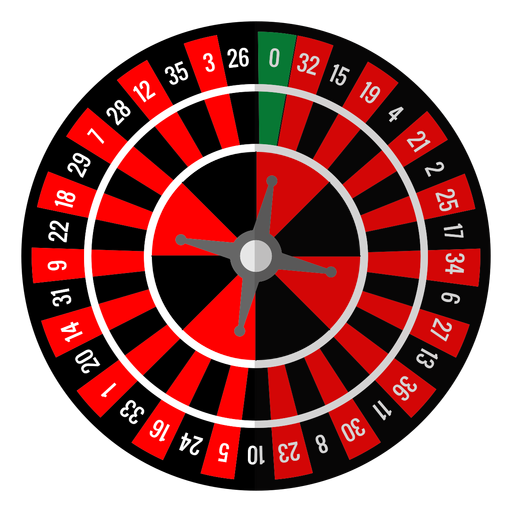

In [4]:
wheel

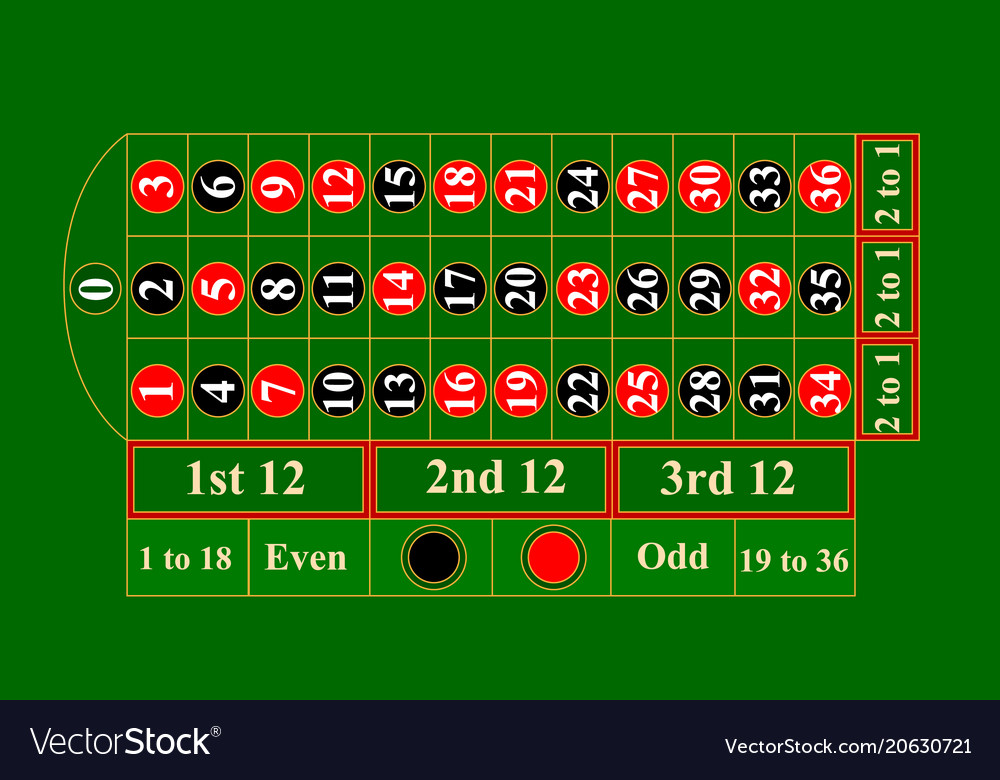

In [5]:
table

## Calculating roulette odds
When it comes to calculating the odds of roulette almost everyone makes the same mistake. I decided to do my own research so I asked 20 friends what are the odds of winning a binary bet (red/black, even/odd, low/high). 19 out of the 20 people I asked, without any hesitation instantly said: "Its 50%". Some even asked me why I ask such stupid questions. However one guy said: "It's less than 50%". And he is right. To be exact, the chance of winning a binary bet is 48.60%. Even [this article](https://arxiv.org/pdf/1707.00529.pdf) states that the probability is 50%: *"...system such as a coin flip or a roulette game in which both payouts and odds are 1:1.", "...betting systems in which the chance of winning is 50%."* If this article covered only a **fair** coin flip it would be completely right. But it is stated that it works for roulette, too. So if we use the information in it to calculate roulette probabilities it will be completely wrong. Even on most casino websites is stated that the winning chance of roulette is 50%.

But why, tho? Why is everyone wrong when asked this simple question? The answer is pretty simple. Everybody forgets the <font color='green'>green zero</font>. This single number turns the odds in favor of the casino. Most people don't even think about the <font color='green'>zero</font>. They play like it's not even there. In fact in most strategies you never bet on it. However it is the main gamechanger of this game. Without it the chance of wining the **binary** bets is exactly 50%. This means that the casino is not guaranteed to win every time.

Lets take a look in the mathematical explanation why the winning chance is not 50%. As stated in [this article](http://probability.infarom.ro/roulette.html) we calculate the probability of winning a bet with the formula 

$$P_{(A)}=\frac{A}{R}$$ 

Where $A$ is the set of numbers we bet on (<font color='red'>red</font>/black , even/odd, low/high, column/row) and $R$ is the set of all numbers on the wheel. Here I have calculated the probability of rolling a <font color='red'>red</font> number.

$$P_{(A)}=\frac{A}{R} \rightarrow P_{(red)}=\frac{18}{37} \rightarrow P_{(red)}=0,4865 \rightarrow P_{(red)}=48,60\%$$

In the table below you can see the probability for each bet calculated with that same formula, as well as it's payout.

 <h4><center>European roulette win probability</center></h4>
 
 <table style="width:35%">
  <tr>
    <th><center>Bet</center></th>
    <th><center>Probability [%]</center></th>
    <th><center>Payout</center></th>
  </tr>
  <tr>
    <td><center>Red/Black</center></td>
    <td><center>18/37 or 48,60%</center></td>
    <td><center>1 to 1</center></td>
  </tr>
  <tr>
  <tr>
    <td><center>Even/Odd</center></td>
    <td><center>18/37 or 48,60%</center></td>
    <td><center>1 to 1</center></td>
  </tr>
    <tr>
    <td><center>Low/High</center></td>
    <td><center>18/37 or 48,60%</center></td>
    <td><center>1 to 1</center></td>
  </tr>
   <tr>
    <td><center>Single row</center></td>
    <td><center>12/37 or 32,40%</center></td>
    <td><center>2 to 1</center></td>
  </tr>
  <tr>
    <td><center>Single dozen</center></td>
    <td><center>12/37 or 32,40%</center></td>
    <td><center>2 to 1</center></td>
  </tr>
  <tr>
    <td><center>Single number</center></td>
    <td><center>1/37 or 2,70%</center></td>
    <td><center>35 to 1</center></td>
  </tr>

As you can see the probability for <font color='red'>red</font>/black, even/odd and low/high bet is the same. In tests and simulations there will be no difference no matter which one we use. In most of the examples I have used a bet on <font color='red'>red</font>/black because it is easier to understand. Take a look at the "Payout" section in the table above. As explained in [this article](https://arxiv.org/pdf/1807.04635.pdf) when betting on binary bets there are only 2 outcomes- win or lose. Lets assume that the player makes a bet $x$. If the outcome turns out to be the winning one, the player gains profit $x$, otherwise the player loses $x$ amount of money. This is because the payout is 1 to 1. If the player places his bet on a row for example, then his probability on winning it goes down to 32.40%, but the payout goes up to 2 to 1. If he bets $x$, this time he will gain profit $2\times x$. 

The american roulette mentioned earlier, differes only by the fact that it has 2 <font color='green'> green zeros</font>. This makes the sum of all numbers 38. When we use the same formula as above, we divide by 38 in stead of 37. This causes the probabilities to go even lower. Here is the same calculation for the probability of rolling a <font color='red'>red</font> number, but on american roulette.

$$P_{(A)}=\frac{A}{R} \rightarrow P_{(red)}=\frac{18}{38} \rightarrow P_{(red)}=0,4736 \rightarrow P_{(red)}=47,40\%$$

There is a $1,2\%$ difference. It's not much but in the long run it might be crucial. Here is a table containing each bet with it's probability for the american roulette. The payouts are exactly the same as the european one. After it is a histogram comparing the results from both tables. The data for it is gathered by the file "probability.dat" in the project folder. It contains the data from both tables.

 <h4><center>American roulette win probability</center></h4>
 
 <table style="width:35%">
  <tr>
    <th><center>Bet</center></th>
    <th><center>Probability [%]</center></th>
    <th><center>Payout</center></th>
  </tr>
  <tr>
    <td><center>Red/Black</center></td>
    <td><center>18/38 or 47,40%</center></td>
    <td><center>1 to 1</center></td>
  </tr>
  <tr>
  <tr>
    <td><center>Even/Odd</center></td>
    <td><center>18/38 or 47,40%</center></td>
    <td><center>1 to 1</center></td>
  </tr>
    <tr>
    <td><center>Low/High</center></td>
    <td><center>18/38 or 47,40%</center></td>
    <td><center>1 to 1</center></td>
  </tr>
   <tr>
    <td><center>Single row</center></td>
    <td><center>12/38 or 31,60%</center></td>
    <td><center>2 to 1</center></td>
  </tr>
  <tr>
    <td><center>Single column</center></td>
    <td><center>12/38 or 31,60%</center></td>
    <td><center>2 to 1</center></td>
  </tr>
  <tr>
    <td><center>Single number</center></td>
    <td><center>1/38 or 2,60%</center></td>
    <td><center>35 to 1</center></td>
  </tr>

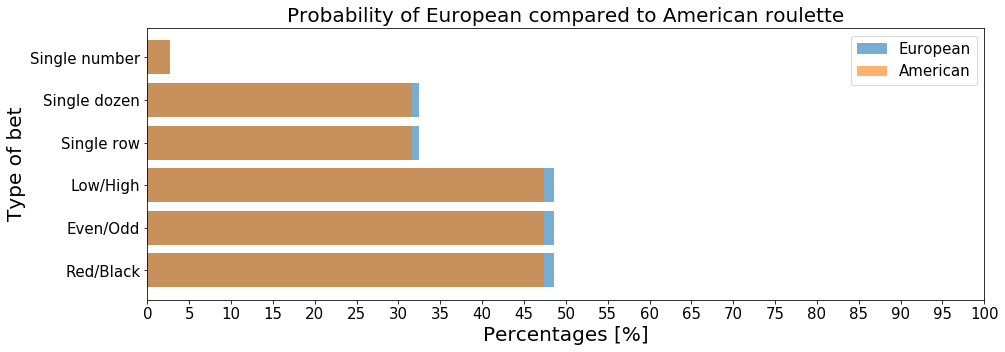

In [6]:
probability = pd.read_csv("probability.dat", sep="\t", header=None) # Reading the data
probability.columns = ["European", "American"]

fig=plt.figure(figsize=(15, 5))
plt.barh(probability.index, probability["European"], alpha=0.6, label="European")
plt.barh(probability.index, probability["American"], alpha=0.6, label="American")

plt.yticks([0, 1, 2, 3, 4, 5],
          ["Red/Black", "Even/Odd", "Low/High", "Single row", "Single dozen", "Single number"], fontsize=15)
plt.xticks(range(0, 101, 5), fontsize=15)
plt.ylabel("Type of bet", fontsize = 20)
plt.xlabel("Percentages [%]", fontsize=20)
plt.legend(fontsize=15)
plt.title("Probability of European compared to American roulette", fontsize=20)
plt.show()

The european roulette has slightly better chances of winning each bet. They might be small and insignificant at first glance, but every single percent matters. That's why in this project I have only covered European roulette. There is no point in playing American if you have a choice between both. You get a smaller chance at winning the same money as the european roulette.

## Generating the data
In order to analyze different roulette strategies, first we need to generate data. For that we use a data generator. To have a properly working data generator we need some requirements checked:

    1.Is the generator generating the right data
    2.Is the data biassed

In the project folder you can find the file "numbers.json". In it I have placed every possible outcome (number) of a spin, as well as all its properties like color, parity, low or high. In the next 3 cells you can see code that generates and plots the data onto a histogram. In the first cell we load the data. In the second one is the function that generates the data. Note that if you run this function alone you will get only one number as a result. In order to get multiple results we use the first and second lines of the third cell. Written like this the function will generate 100 numbers. After this we count how many occurences each number has and then we plot the data onto a histogram.

In [7]:
numbers = json.load(open("numbers.json"))   # Loading the data

In [8]:
def roll_number():  # Generating a random number
    return int(random.choice(list(numbers.keys())))  

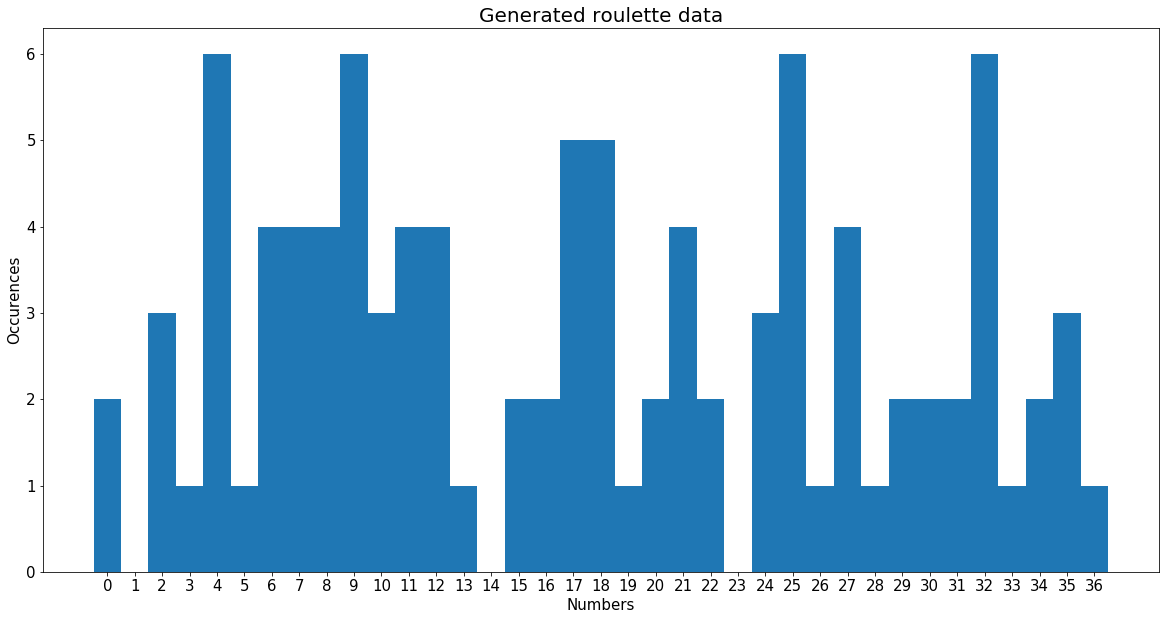

In [9]:
times_to_run = 100
rolls = [roll_number() for i in range(times_to_run)]  #Generating the data

counts = Counter(rolls) # Counting how many occurences each number has.

plt.figure(figsize = (20,10))  # Plotting the data onto a histogram
plt.title("Generated roulette data", fontsize = 20)
plt.hist(rolls, bins = np.arange(0, 38)-0.5)
plt.xticks(range(0, 37), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Numbers", fontsize=15)
plt.ylabel("Occurences", fontsize = 15)

plt.show()

This histogram confirms that our first requirement is there. The generator is generating numbers in the range(0-36). Right now the histogram looks very distorted. If we want to confirm our second requirement the histogram has to look like a rectangle with very little differences in the times each number was generated. There must not be a bell curve or anything like this. Right now there are many rolls of some numbers and a very few or even none of others. Does this mean that our generator is bias? No. This happens because of the *Law of large numbers*. It states that you need a large amount of data in order to make any conclusions. You can read more about it [here](https://en.wikipedia.org/wiki/Law_of_large_numbers). The histogram looks like this because we have only generated 100 numbers. The data in the following histogram is gathered from 500000 rolls.

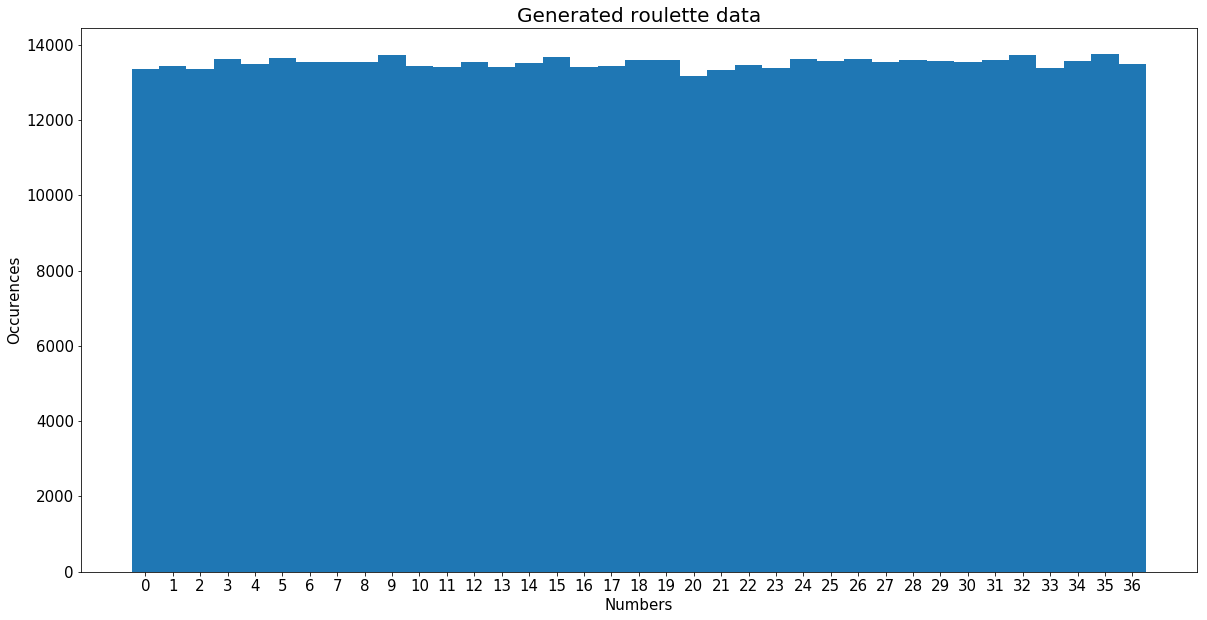

In [10]:
times_to_run = 500000
rolls = [roll_number() for i in range(times_to_run)]
counts = Counter(rolls)

plt.figure(figsize = (20,10))
plt.title("Generated roulette data", fontsize = 20)
plt.hist(rolls, bins = np.arange(0, 38)-0.5)
plt.xticks(range(0, 37), fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Numbers", fontsize=15)
plt.ylabel("Occurences", fontsize = 15)

plt.show()

As you can see this one looks far better. There still might be some little peaks, but if we run it again they will change. So we have our second requirement done. This proves that this generator is working properly and can be used to generate valid data.

## Simulating and analyzing roulette strategies
When playing roulette there are two types of people: those who bet on whatever they feel like and those who use strict stragegies. Here I have tested some of the most famous strategies, as well as some strange ones to see if they are any good. After explaining each strategy, you can see a simulation of it with analisis of the results. In almost every roulette strategy the [Gambler's fallacy](https://en.wikipedia.org/wiki/Gambler%27s_fallacy) law is in effect. This is a mistaken belief that, if something happens more frequently than normal, this means it is less likely to happen again. For some reason if there have been 10 <font color='red'>reds</font> in a roll people think that the chance for the next one to be black is bigger than to be a <font color='red'>red</font> again. The probability of rolling any number is not determined by what has been rolled before it. I have proven the *Gampler's fallacy* wrong many times in the simulations.

Of course in real life there is always the human factor. The person playing can stop at any given moment. The human factor is too unpredictable to be simulated. The point of the following simulations is to show what happens if the player does not stop and continues to bet, driven by the possible wins that are hiding behind the corner. 

### Martingale Strategy
This is probably the most popular and commonly used roulette strategy. It is pretty simple to follow - you asign a starting bet. **After each loss you double your bet. After a win you go back to the starting bet.** Those types of strategies where you increase your bet when certain conditions are met are called *Progressive betting*. The bets used here are only the binary ones. When using this strategy most people continue to bet on the same thing. For example you start with <font color='red'>red</font> and you continue to bet on <font color='red'>red</font> until you win (Gambler's fallacy in action). Others bet on a different color each time. I have tested both ways to see if there is any difference.

Using this strategy, the bets form a geometric progression, where $a$(the first term) = first bet and $r$(common ratio) = 2. We can use the following formula to show the geometric progression formed by this strategy.

$$a_n=ar^{n-1}$$

When you start with a bet of 1 you don't expect to go much higher. If you write down the number sequence things escalate very quickly. This is the progression the bets form:

$$1\to2\to4\to8\to16\to32\to64\to128\to256\to512\to1024\to2048\to4096\to8192$$

Using this strategy you lose when the spin is the different color of what you bet on, or it iz zero. As you don't ever bet on zero, each time it rolls it's a guarantee lost. The danger of those progressive betting strategies and especially this one where you double the bet each time, is that if you encounter a so called *losing streak* - losing a number of bets in a row, you are probably going bankrupt. Because the bets go up in size so fast you will run out of money before you know it. Many strategies are based on this one. 

Here is a example of a game. You bet 1\\$. You lose, so you bet 2\\$. You lose again, so you bet 4\\$. You win and you gain 8\\$. The sum of all bets until this last win is 7\\$. If you have a losing streak and finish with a win, you always gain the starting bet (8\\$-7\\$ = 1\\$).

The following function bets on red or black. Each bet it randomly choses which one to bet on. The code is expalined with coments.

In [11]:
balance_through_game=[] #List containing the balance throughout the game
win_lose_ratio=[] #List containing if the game is a win or lose. Used in the histogram of many games.

def martingale_strategy_random_bet(number_of_games=100, balance=100, bet_amount=2):
    """
    This function bets randomly on red or black. On loss it doubles the bet. 
    On win it bets with the starting bet amount.
    This is a common roulette strategy known as the Martingale strategy.
    """
    choices=["red", "black"]    # Possible colors to bet on
    starting_money = balance    # This variable is used later on to determin if the is win or not.
    current_bet = bet_amount    # This variable contains the bet that is need to be made throughout the whole game

    for i in range(0, number_of_games):  # Playing as many games as asigned in the function properties
        roll = random.choice(list(numbers.keys()))   # Generating a random number
        bet = random.choice(choices)   # Choseing a color to bet on

        if balance <= current_bet:   # This makes sure you cant end up on negative balance. If your balance
            current_bet = balance    # is lower than the bet you have to make, it bets everything you have left

        if numbers[roll][0] == bet: # If you win
            balance += current_bet
                
            balance_through_game.append(balance)    # Ading the current balance to the list used for plotting the data
            current_bet = bet_amount  # Making the next bet the starting bet                
        else:   # If you lose
            balance -= current_bet
            balance_through_game.append(balance)  # Ading the current balance to the list used for plotting the data
            if balance <= 0:                      # Stops the game if the balance is 0 or lower
                balance_through_game.append(balance)
                break
            current_bet = current_bet * 2  # Doubling the bet for the next spin
            
    if starting_money > balance:          #Counts the wins and loses
        win_lose_ratio.append("loss")
    else:
        win_lose_ratio.append("win")

Let's take a look at some plots of this function. According to the *Law of large numbers* we need a lot of data to decide weather a strategy is winning or not. Otherwise we will end up with wrong results like the first generator test. Even though there are six plots, they are not even close to enough to make any conclusions. They are there just to get a general idea of what the strategy looks. Under them you can see a histogram showing the ratio of won to lost games. The data for it is gathered from 10000 games.

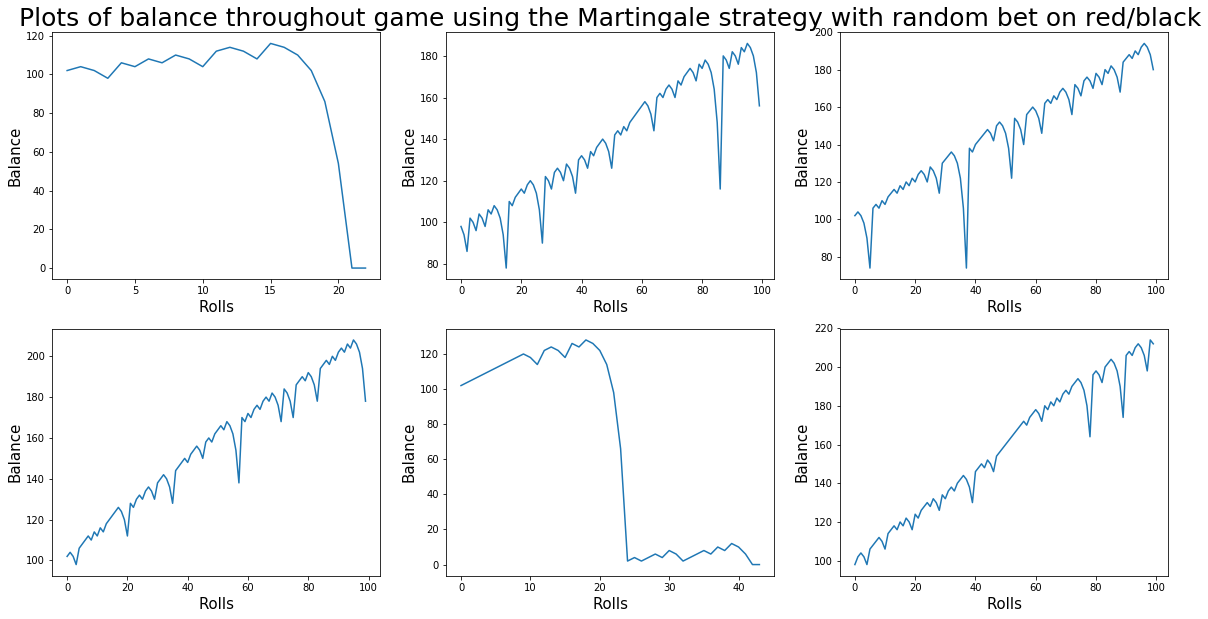

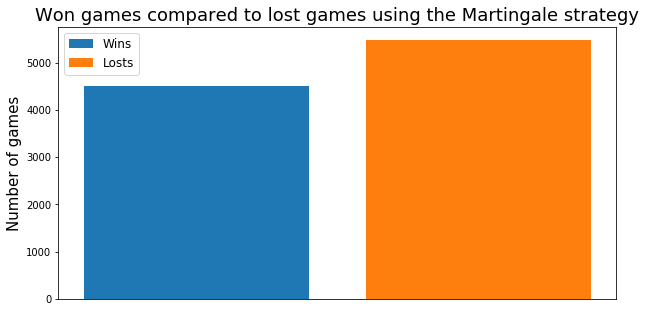

In [12]:
plt.figure(figsize=(20, 10))

# Plotting each of the 6 plots
balance_through_game=[] 
martingale_strategy_random_bet()
plt.subplot(2,3,1)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_random_bet()
plt.subplot(2,3,2)
plt.title("Plots of balance throughout game using the Martingale strategy with random bet on red/black", fontsize = 25)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_random_bet()
plt.subplot(2,3,3)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_random_bet()
plt.subplot(2,3,4)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_random_bet()
plt.subplot(2,3,5)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_random_bet()
plt.subplot(2,3,6)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

plt.show()


# Plotting the histogram
num_of_games = 10000 # The number of games the data is gathered from.
win_lose_ratio=[]

for i in range(0, num_of_games):
    martingale_strategy_random_bet()
    
counts = Counter(win_lose_ratio)
wins = counts["win"]
loses = counts["loss"]

plt.figure(figsize = (10,5))
plt.title("Won games compared to lost games using the Martingale strategy", fontsize=18)
plt.bar(0, wins, label="Wins")
plt.bar(1, loses, label="Losts")
plt.ylabel("Number of games", fontsize = 15)
plt.yticks(fontsize=10)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.legend(fontsize = 12)
plt.show()

Some of the plots are wins. Most of the times you generate the plots you should get at least a third of them with winning results. Is this it :O ? Why don't we all just rush into a casino and earn easy money? Well there is a reason for this. First lets analyse the plots. If it is a winning one you can see that it is growing slowly with small wins at a time. It takes a lot of spins to win while at this time you must not encounter a losing streak. On the other hand if we take a look at the losing plots we can see they are very steep at the end. This is how the losing streak looks on the plot. Sure if you happen to be on some of those winning plots you see above and you stop playing at a moment you are winning money, you take them. But most people will continue to gain more money until they fall into a losing streak. 

Some will say: "But what if you never encounter a losing streak?". You can't. Eventually you will run into one and you will lose everything. It's just a matter of time before this happens. Here is a histogram of a the same function, but playing 500 games, in stead of the 100 in the previous one.

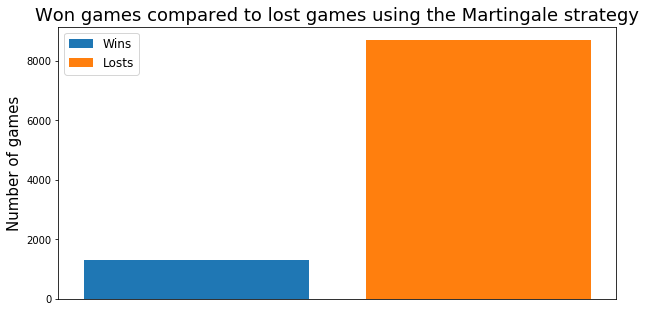

In [13]:
# Plotting the histogram
num_of_games = 10000 # The number of games the data is gathered from.
win_lose_ratio=[]

for i in range(0, num_of_games):
    martingale_strategy_random_bet(number_of_games=500)
    
counts = Counter(win_lose_ratio)
wins = counts["win"]
loses = counts["loss"]

plt.figure(figsize = (10,5))
plt.title("Won games compared to lost games using the Martingale strategy", fontsize=18)
plt.bar(0, wins, label="Wins")
plt.bar(1, loses, label="Losts")
plt.ylabel("Number of games", fontsize = 15)
plt.yticks(fontsize=10)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.legend(fontsize = 12)
plt.show()

As you can the wins are fewer than the histogram of 100 games. This is a proof of that if you continue to play more games after a small win, you are going to experience a losing streak at some point. It is inevitable.

Just for kicks-and-giggles lets see if betting on the same color every time makes any difference. The following function always bets on <font color='red'>red</font>. After it you can find plots and histogram like on the previous one.

In [14]:
balance_through_game=[] #List containing the balance throughout the game
win_lose_ratio=[] #List containing if the game is a win or lose. Used in the histogram of many games.

def martingale_strategy_always_red(number_of_games=100, balance=100, bet_amount=2):
    """
    This function always bets on red. 
    On loss it doubles the bet. 
    On win it bets with the starting bet amount.
    This is a common roulette strategy known as the Martingale strategy.
    """
    choices=["red", "black"]    # Possible colors to bet on
    starting_money = balance    # This variable is used later on to determin if the is win or not.
    current_bet = bet_amount    # This variable contains the bet that is need to be made throughout the whole game

    for i in range(0, number_of_games):  # Playing as many games as asigned in the function properties
        roll = random.choice(list(numbers.keys()))   # Generating a random number
        bet = random.choice(choices)   # Choseing a color to bet on

        if balance <= current_bet:   # This makes sure you cant end up on negative balance. If your balance
            current_bet = balance    # is lower than the bet you have to make, it bets everything you have left

        if numbers[roll][0] == bet: # If you win
            balance += current_bet
                
            balance_through_game.append(balance)    # Ading the current balance to the list used for plotting the data
            current_bet = bet_amount  # Making the next bet the starting bet                
        else:   # If you lose
            balance -= current_bet
            balance_through_game.append(balance)  # Ading the current balance to the list used for plotting the data
            if balance <= 0:                      # Stops the game if the balance is 0 or lower
                balance_through_game.append(balance)
                break
            current_bet = current_bet * 2  # Doubling the bet for the next spin
            
    if starting_money > balance:          #Counts the wins and loses
        win_lose_ratio.append("loss")
    else:
        win_lose_ratio.append("win")

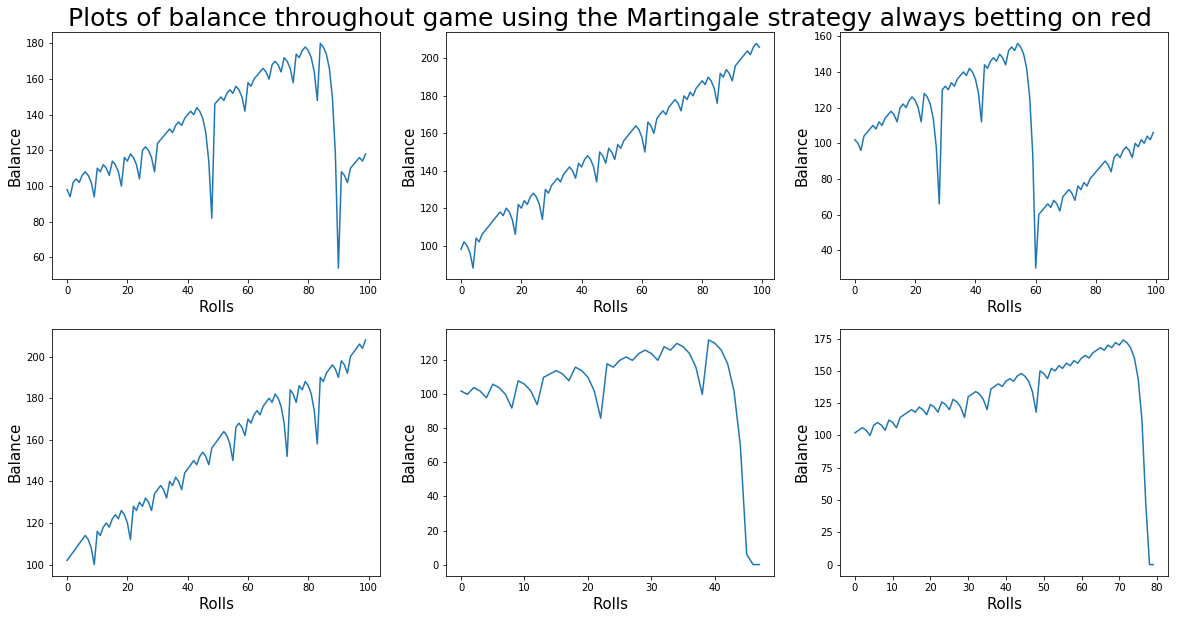

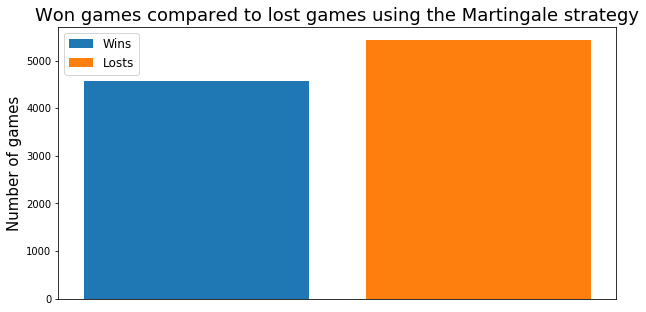

In [15]:
plt.figure(figsize=(20, 10))

# Plotting each of the 6 plots
balance_through_game=[]
martingale_strategy_always_red()
plt.subplot(2,3,1)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_always_red()
plt.subplot(2,3,2)
plt.title("Plots of balance throughout game using the Martingale strategy always betting on red", fontsize = 25)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_always_red()
plt.subplot(2,3,3)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_always_red()
plt.subplot(2,3,4)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_always_red()
plt.subplot(2,3,5)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
martingale_strategy_always_red()
plt.subplot(2,3,6)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

plt.show()


# Ploting the histogram
num_of_games = 10000
win_lose_ratio=[]
for i in range(0, num_of_games):
    martingale_strategy_always_red()
    
counts = Counter(win_lose_ratio)
wins = counts["win"]
loses = counts["loss"]

plt.figure(figsize = (10,5))
plt.title("Won games compared to lost games using the Martingale strategy", fontsize=18)
plt.bar(0, wins, label="Wins")
plt.bar(1, loses, label="Losts")
plt.ylabel("Number of games", fontsize = 15)
plt.yticks(fontsize=10)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.legend(fontsize = 12)
plt.show()

As you can see they are absolutely the same. It does not matter what you bet on. The end results are the same. This is another proof of Gambler's fallacy. This principal applys to the other strategies tested in this project, too. That's why there is no proof of if betting on the same thing every time wins more than changing the bet each time for the other strategies. It is the same. 

If we take a look at the table with probabilities we will see that the probability for <font color='red'>red</font>/black is the same for even/odd and high/low. If this function bets on any of the other binary bets the results will be exactly the same.

As a conclusion for this strategy we can say that it is not impossible to win. First you have to happen to be on a winning plot and then stop when you have won something. If you continue you are just risking to run into a losing streak and lose everything. There is always the chance to start with a losing streak right off the bat. You can find more about the Martingale strategy [here](https://www.roulettesites.org/strategies/martingale/).

### Reverse Martingale (Paroli)
This strategy is also very popular amongst players. The name is there for a reason. While using the normal martingale strategy, you double your bet on a loss, here it is the oposite. **You double your bet on a win and go back to the starting bet on a loss.** You still bet only on the binary bets. Everything said for the normal martingale strategy applys here as well. The following function bets on <font color='red'>red</font> every time. Again, if it was betting on any other binary bet every time the results would have been exatcly the same. After the function you can see plots, which are later analyzed, as well as a histogram comparing the wins and loses from 10000 games.

In [16]:
balance_through_game=[]  # List containing the balance throughout the game
win_lose_ratio=[]  # List containing if the game is a win or lose. Used in the histogram of many games

def reverse_martingale_always_red(number_of_games=100, balance=100, bet_amount=2):
    """
    This function always bets red. On win it doubles the bet. 
    On loss it bets with the starting bet amount.
    This strategy is known as Reverse Martingale "Paroli".
    """

    starting_money = balance  # This variable is used later on to determin if the is win or not
    current_bet = bet_amount  # This variable contains the bet that is need to be made throughout the whole game

    for i in range(0, number_of_games):  # Playing as many games as asigned in the function properties
        roll = random.choice(list(numbers.keys()))   # Generating a random number
        bet = "red"   # The color the function bets on every time

        if balance <= current_bet:  # This makes sure you cant end up on negative balance. If your balance
            current_bet = balance   # is lower than the bet you have to make, it bets everything you have left

        if numbers[roll][0] == bet: #If you win
            balance += current_bet

            balance_through_game.append(balance)  # Ading the current balance to the list used for plotting the data
            current_bet = current_bet * 2  # Doubling the bet for the next spin
        else: #If you lose
            balance -= current_bet
            
            balance_through_game.append(balance)  # Ading the current balance to the list used for plotting the data
            current_bet = bet_amount  # Making the next bet the starting bet
            if balance <= 0:
                balance_through_game.append(balance)
                break
    if starting_money > balance:          #Counts the wins and loses
        win_lose_ratio.append("loss")
    else:
        win_lose_ratio.append("win")

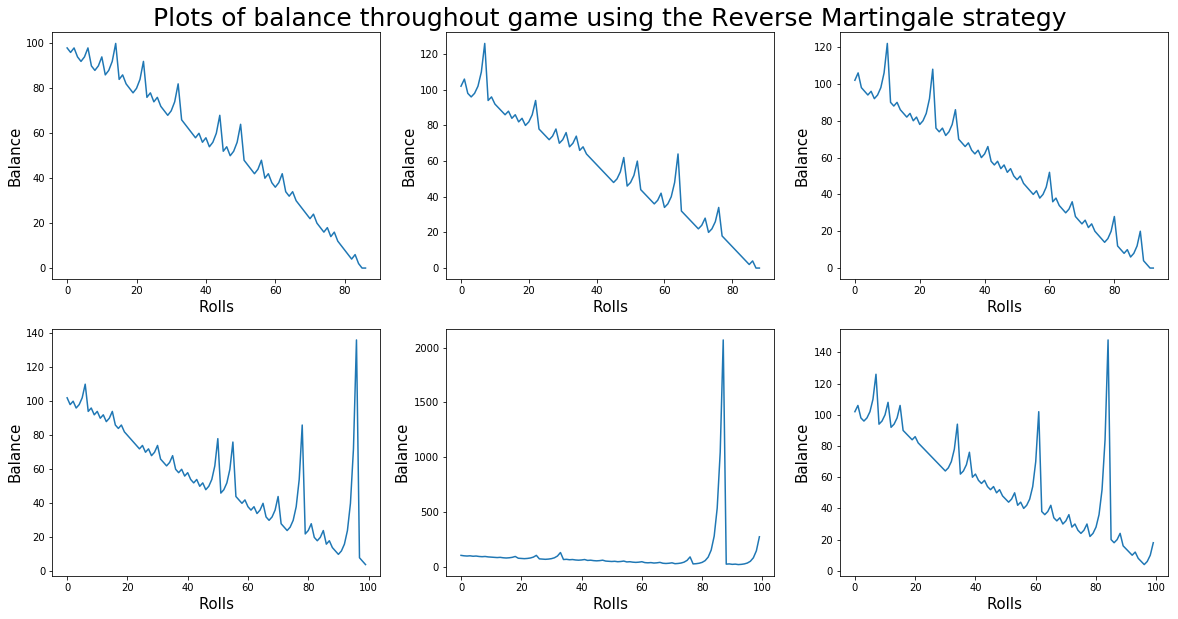

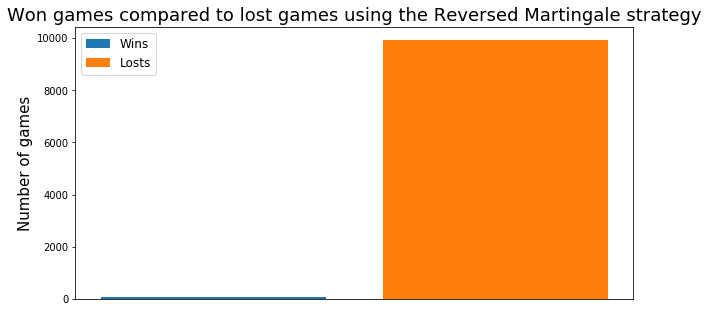

In [17]:
plt.figure(figsize=(20, 10))

# Plotting each of the 6 plots
balance_through_game=[]
reverse_martingale_always_red()
plt.subplot(2,3,1)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
reverse_martingale_always_red()
plt.subplot(2,3,2)
plt.title("Plots of balance throughout game using the Reverse Martingale strategy", fontsize = 25)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
reverse_martingale_always_red()
plt.subplot(2,3,3)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
reverse_martingale_always_red()
plt.subplot(2,3,4)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
reverse_martingale_always_red()
plt.subplot(2,3,5)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
reverse_martingale_always_red()
plt.subplot(2,3,6)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

plt.show()


# Plotting the histogram
num_of_games = 10000
win_lose_ratio=[]
for i in range(0, num_of_games):
    reverse_martingale_always_red()
    
counts = Counter(win_lose_ratio)
wins = counts["win"]
loses = counts["loss"]

plt.figure(figsize = (10,5))
plt.title("Won games compared to lost games using the Reversed Martingale strategy", fontsize=18)
plt.bar(0, wins, label="Wins")
plt.bar(1, loses, label="Losts")
plt.ylabel("Number of games", fontsize = 15)
plt.yticks(fontsize=10)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.legend(fontsize = 12)
plt.show()

If in the normal martingale strategy you see big spikes pointing downwards, here they are pointing uprawrds. The spikes are winning streaks. As you can see in some of the plots they go very high. But after just one loss they go back to where they started from. The only way you can win by using this strategy is by stopping at the peak of a big spike. Otherwise your balance is constantly getting lower as you can see on all the plots. Since you don't know when the winning streak will end it is almost impossible to stop at the right moment. Unlike the normal martingale, if you don't experience a winning strike there is no way to win from it. You literaly are constantly losing more and more while hoping to get a winning streak to earn something. 1 lose while on the winning streak cause you to go lower than you were before.

If we compare the two martingale strategies we will see that the normal one is going up slowly and goes down very fast. The reversed one is going down slowly with very high spikes upwards. If we take a plot of one of the strategies and flip it upside-down we will get a plot of the other one.

The histogram looks like this because as stated, we cannot simulate the human factor. Every person will take a different decision in a given moment. You can win by using this strategy, but in order to do that you should not continue to play after a win. You can find more information about the Reversed Martingale strategy [here](https://www.roulettesites.org/strategies/reverse-martingale/)

### Coutner betting strategy
This is one relatively new when compared to the other strategies. In my opinion this is the most interesting strategy to analyse because you can use a flaw in the roulette in your advantage. As the name suggests, you are not betting on just one thing. The idea of this strategy is that you **bet on 2 of the binary bets at the same time**. You also double your bet on loss and go back to the starting bet on win (just as the Martingale). For example you can bet on <font color='red'>red</font>/black and even/odd. When you bet on 2 binary bets at the same time there are 3 outcomes, in stead of the normal 2. Lets say that you bet \\$1 on <font color='red'>red</font> and \\$1 on even. The outcomes can be:

   1. The rolled number is both red and even. In that case you win \\$4
   2. The rolled number is only red or only even. In that case you don't win anything since the win covers the loss
   3. The rolled number will be neither red or even. In that case you lose \\$2

If you look close into the roulette wheel or table, you will see that the <font color='red'>red</font> and black numbers are not devided into 9 odd and 9 even as expected. The <font color='red'>red</font> numbers have 8 even and 10 odd numbers, while the black numbers have 10 even and 8 odd numbers. This means that the probability of rolling a odd <font color='red'>red</font> is bigger than rolling even <font color='red'>red</font>.
Let's calculate the chances of each pair of binary bets winning. We can do that by calculating them with the formula from the beggining:

$$P(A)=\frac{A}{R}$$ 

Here is calculated the probability of rolling a <font color='red'>red</font> even number. There are 8 of those on the roulette wheel, so this is the set of numbers we use.

$$P_{(A)}=\frac{A}{R} \rightarrow P_{(A)}=\frac{8}{37} \rightarrow P_{(A)}=0,2162 \rightarrow P_{(A)}=21,60\%$$ 

In the following table you can see the probability of each pair of binary bets.

 <h4><center>European roulette win probability of combinations of binary bets</center></h4>
 
 <table style="width:35%">
  <tr>
    <th><center>Bet</center></th>
    <th><center>Probability [%]</center></th>
  </tr>
  <tr>
    <td><center>Red-Even</center></td>
    <td><center>8/37 or 21,60%</center></td>
  </tr>
  <tr>
  <tr>
    <td><center>Red-Odd</center></td>
    <td><center>10/37 or 27,00%</center></td>
  </tr>
   <tr>
    <td><center>Black-Even</center></td>
    <td><center>10/37 or 27,00%</center></td>
  </tr>
   <tr>
    <td><center>Black-Odd</center></td>
    <td><center>8/37 or 21,60%</center></td>
  </tr>
  <tr>
    <td><center>Red-Low</center></td>
    <td><center>9/37 or 24,30%</center></td>
  </tr>
  <tr>
    <td><center>Red-High</center></td>
    <td><center>9/37 or 24,30%</center></td>
  </tr>
    <tr>
    <td><center>Black-Low</center></td>
    <td><center>9/37 or 24,30%</center></td>
  </tr>
  <tr>
    <td><center>Black-High</center></td>
    <td><center>9/37 or 24,30%</center></td>
  </tr>

Apart from calculating the probabilities with the math formula shown above, we can be sure the probabilites are right by summing the probabilities for one color for both even and odd. The result should be the probability of rolling this color, calculated in the first table. Here this is tested using the color <font color='red'>red</font>.

$$P_{(red-even)} + P_{(red-odd)} = P_{(red)} \rightarrow 21,60\% + 27,00\%= 48,60\%$$

(The same is for each color with low and high)

Now we are completely sure in the calculations for each bet. As you can see the probability for even <font color='red'>red</font> is not the same as odd <font color='red'>red</font> (same for black-even and black-odd). The difference is huge - 5,40\%. Without taking a closer look at the roulette table and wheel you won't even notice this. There is no point in betting on even <font color='red'>red</font>, when betting the same amount of money on odd <font color='red'>red</font> gives you additional 5,40\% win chance for free.

First lets see how the plot of this function looks like. The following function always bets on odd <font color='red'>red</font>. After it you can see the plot as well as a histogram of wins-loses.

In [18]:
balance_through_game=[]  # List containing the balance throughout the game
win_lose_ratio=[]  # List containing if the game is a win or lose. Used in the histogram of many games.

def counter_betting_strategy(number_of_games=100, balance=100, bet_amount=2):
    """
    This function always bets on odd red. On loss it doubles the bet. 
    On win it bets with the starting bet amount.
    This type of strategy where you bet on 2 binary bets is known as Counter Betting.
    """
    starting_money = balance  # This variable is used later on to determin if the is win or not.
    current_bet = bet_amount*2  # This variable contains the bet that is need to be made throughout the whole game
                                # It is times two because you bet on 2 different bets.
        
    for i in range(0, number_of_games):  # Playing as many games as asigned in the function properties
        roll = random.choice(list(numbers.keys()))   # Generating a random number
        bet1 = "red" # Assigning the first bet
        bet2 = "odd" # Assigning the second bet

        if balance <= current_bet:  # This makes sure you cant end up on negative balance. If your balance
            current_bet = balance   # is lower than the bet you have to make, it bets everything you have left

        if numbers[roll][0] == bet1 and numbers[roll][1] == bet2: #If you win
            balance += current_bet
            
            balance_through_game.append(balance)  # Adding the current balance to the list used for plotting the data
            current_bet = bet_amount*2  # Doubling the bet for the next spin
        elif numbers[roll][0] == bet1 or numbers[roll][1] == bet2:  # If you win one bet and lose the other one
            balance += 0  # The balance does not change in that case
            balance_through_game.append(balance)# Adding the current balance to the list used for plotting the data
        elif numbers[roll][0] != bet1 and numbers[roll][1] != bet2: #If you lose
            balance -= current_bet
            
            balance_through_game.append(balance)  # Adding the current balance to the list used for plotting the data
            if balance <= 0:  # Stops the game if the balance is 0 or lower
                break
            current_bet = current_bet * 2
    if starting_money > balance:
        win_lose_ratio.append("loss")
    else:
        win_lose_ratio.append("win")

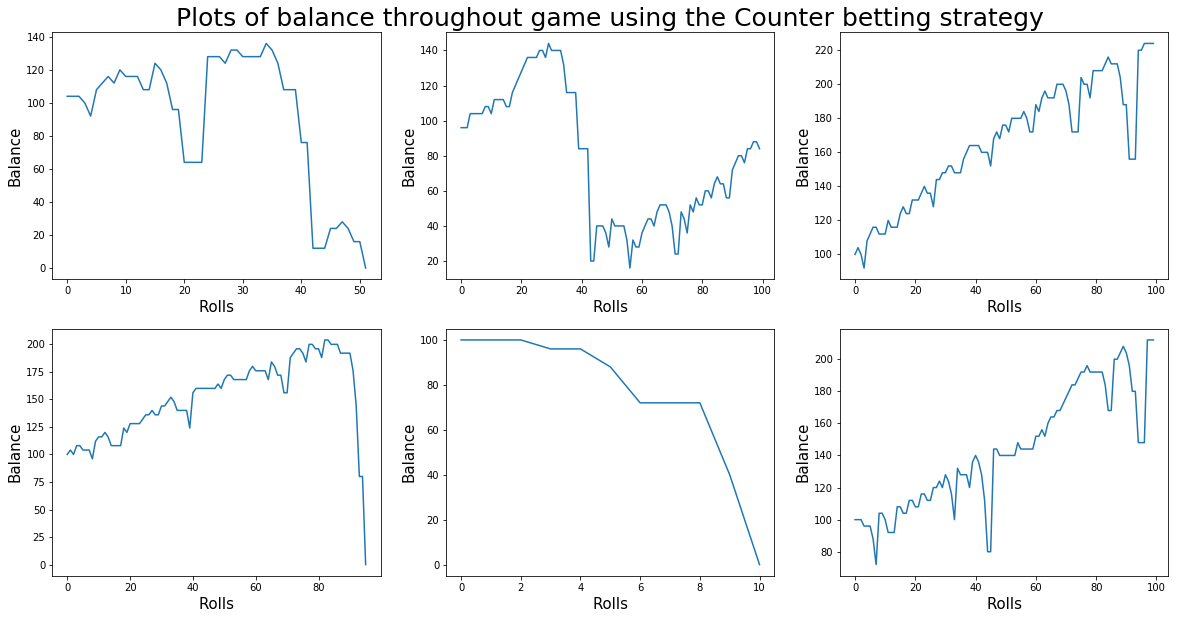

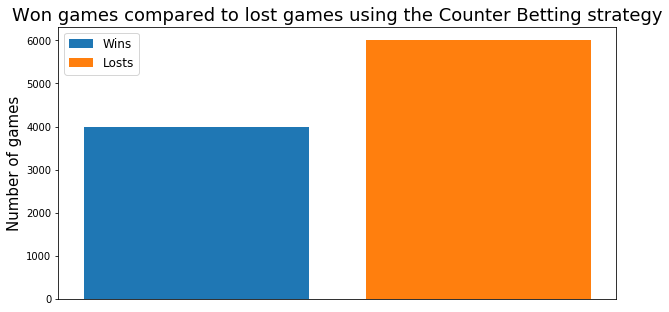

In [19]:
plt.figure(figsize=(20, 10))

# Plotting each of the 6 plots
balance_through_game=[]
counter_betting_strategy()
plt.subplot(2,3,1)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
counter_betting_strategy()
plt.subplot(2,3,2)
plt.title("Plots of balance throughout game using the Counter betting strategy", fontsize = 25)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
counter_betting_strategy()
plt.subplot(2,3,3)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
counter_betting_strategy()
plt.subplot(2,3,4)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
counter_betting_strategy()
plt.subplot(2,3,5)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
counter_betting_strategy()
plt.subplot(2,3,6)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

plt.show()


# Plotting the histogram
num_of_games = 10000
win_lose_ratio=[]
for i in range(0, num_of_games):
    counter_betting_strategy()
    
counts = Counter(win_lose_ratio)
wins = counts["win"]
loses = counts["loss"]

plt.figure(figsize = (10,5))
plt.title("Won games compared to lost games using the Counter Betting strategy", fontsize=18)
plt.bar(0, wins, label="Wins")
plt.bar(1, loses, label="Losts")
plt.ylabel("Number of games", fontsize = 15)
plt.yticks(fontsize=10)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.legend(fontsize = 12)
plt.show()

If you look at the plots you can see that there are many horizontal lines. This can be seen only in this strategy, because there is a outcome of a bet where you keep the same balance and bet (when one of the conditions is met). Those horizontal lines show exactly that outcome. This cannot be seen on the other strategies, since using them you always lower or rise your bet for the next spin. The fact that here you can maintain the same bet for a long period of time can help you maintain a stable balance for longer, when compared to the other strategies. 

If we use the example from before- bet on odd <font color='red'>red</font>, we can see that the chance to both of them winning is 27,00\%. The chance of winning one of the bets is same for both <font color='red'>red</font> and odd - 48,60\%. Knowing those two we can calculate the chance of not winning any of the 2 bets we made with the formula:

$$P_{(L)}= 100\% - (P_{(D)} + P_{(B)}) $$

where $P_{(D)}$ is the probability of the double bet we made and $P_{(B)}$ is the probability of one of the bets we made. Since they are all binary it does't matter which one we chose because they all have the same probability - 48,60\%. Here is the calculation for the bet we made - <font color='red'>red</font> and odd

$$P_{(L)}= 100\% - (P_{(D)} + P_{(B)}) \rightarrow P_{(L)}= 100\% - (27,00\% + 48,60\%) \rightarrow P_{(L)}= 100\% - 75,60\% \rightarrow P_{(L)}= 24,40\%$$

So if we bet on odd <font color='red'>red</font> 27,00\% of the time both of our bets will win. 48,60\% of the time only one of the bets will win, causing you to maintain the same balance as before the bet. And 24,40\% of the time none of the bets you made will win, causing you to lose both of them. Here is a table with all of the possible Counter Betting bets probabilities for each of the 3 scenarios.

 <h4><center>European roulette win probability of Counter Betting bets</center></h4>
 
 <table style="width:35%">
  <tr>
    <th><center>Bet</center></th>
    <th><center>Probability of winning both bets [%]</center></th>
    <th><center>Probability of winning only one of the bets [%]</center></th>
    <th><center>Probability of losing both bets [%]</center></th>
  </tr>
  <tr>
    <td><center>Red-Even</center></td>
    <td><center>21,60%</center></td>
    <td><center>48,60%</center></td>
    <td><center>29,80%</center></td>
  </tr>
  <tr>
  <tr>
    <td><center>Red-Odd</center></td>
    <td><center>27,00%</center></td>
    <td><center>48,60%</center></td>
    <td><center>24,40%</center></td>
  </tr>
   <tr>
    <td><center>Black-Even</center></td>
    <td><center>27,00%</center></td>
    <td><center>48,60%</center></td>
    <td><center>24,40%</center></td>
  </tr>
   <tr>
    <td><center>Black-Odd</center></td>
    <td><center>21,60%</center></td>
    <td><center>48,60%</center></td>
    <td><center>29,80%</center></td>
  </tr>

As you can see the probability of losing both bets is still more than winning them. However if you use this strategy the game will be slower, but longer. You will not go bankrup as fast as using the normal Martingale strategy, because in 48,60\% of the rolls nothing will happen. The danger of Counter Betting is also a losing strike. Even though you win and lose less frequently it is still possible to go into a fatal losing strike.

### Always betting on a single number
Another misconception about roulette is that the <font color='green'>zero</font> is more rare than any other number. Almost everyone I asked said that. Just because it is in a different color than the rest of the numbers does not make it more rare. In fact if we look into the histogram where we tested if the generator is biased, we can see that it is generated as many times as any other number. It is on the wheel with the other numbers. It is in the same type of sector as the other numbers. There is no reason to believe that it is more rare to roll. The chance of rolling <font color='green'>0</font> is absolutely the same as rolling any other number - 2.70%.

What if every tine we bet on a single number? Sounds stupid at first. Why not bet on a binary bet where you have a 48.60% probability of winning, but bet on a single number where the win probability drops down to 2.70%? If we look at the table at the beggining, we can see that the payouts are different, too. If you bet 1\\$ on a single number and win it, you will win 36\\$. The idea behind that strategy is that you roll a number $\frac{1}{37}$ of the times (2.70%). If you keep betting on the same number every time you will eventually win. Then the win will be 36 times the bet you made. But this only works if you roll your number more than 1 time every 37 rolls. This happens rarely and that's why you **do not double the bet after a loss**. Otherwise you will go bankrupt too fast.

Here is a function that bets on $4$ every time as well as plots of it and a histogram of 10000 games. It doesn't matter on which of the 37 numbers it bets on. They all have 2.70\% probability to be generated each spin (even the <font color='green'>0</font>).

In [20]:
balance_through_game=[]  # List containing the balance throughout the game
win_lose_ratio=[]  # List containing if the game is a win or lose. Used in the histogram of many games.

def always_bet_four(number_of_games=100, balance=100, bet_amount=2):
    """
    This function always bets on four. On loss it doesnt double the bet.
    """
    starting_money = balance  # This variable is used later on to determin if the is win or not.
    current_bet = bet_amount  # This variable contains the bet that is need to be made throughout the whole game

    for i in range(0, number_of_games):  # Playing as many games as assigned in the function properties
        roll = random.choice(list(numbers.keys()))   # Generating a random number
        bet = "four"   # Assigning the number to bet on

        if numbers[roll][3] == bet: #If you win
            balance += current_bet * 36

            balance_through_game.append(balance)  # Adding the current balance to the list used for plotting the data
        else: #If you lose%
            balance -= current_bet
            
            balance_through_game.append(balance)  # Adding the current balance to the list used for plotting the data
            if balance <= 0:  # Stops the game if the balance is 0 or lower
                balance_through_game.append(balance)  # Adding the current balance to the list used for plotting the data
                break
    if starting_money > balance:          #Counts the wins and loses
        win_lose_ratio.append("loss")
    else:
        win_lose_ratio.append("win")

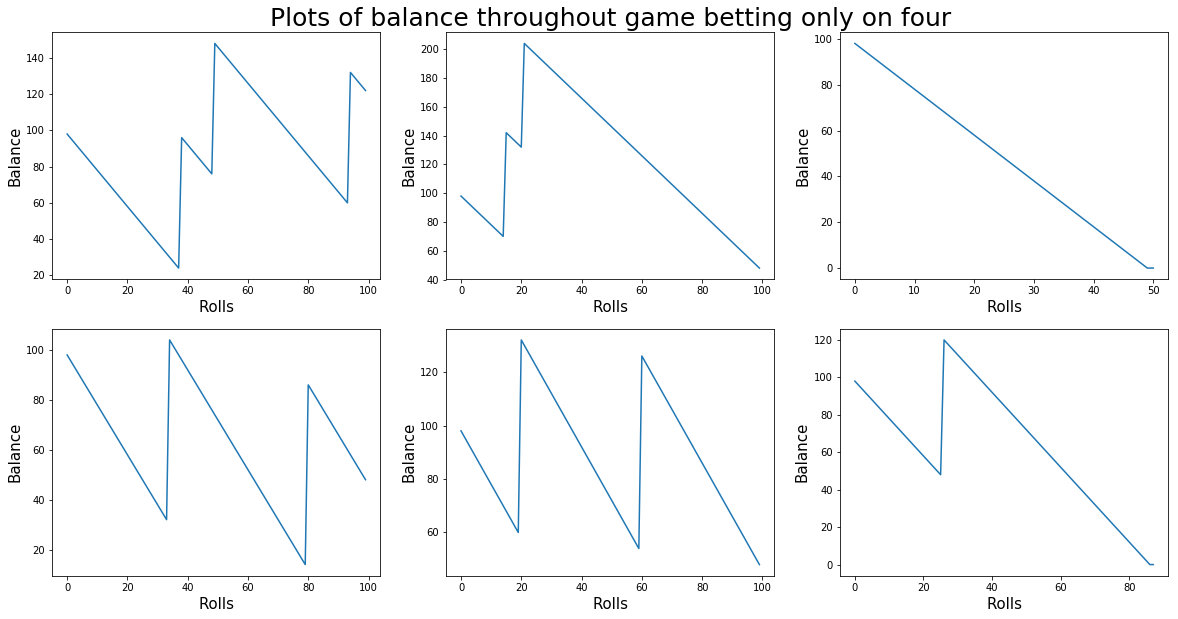

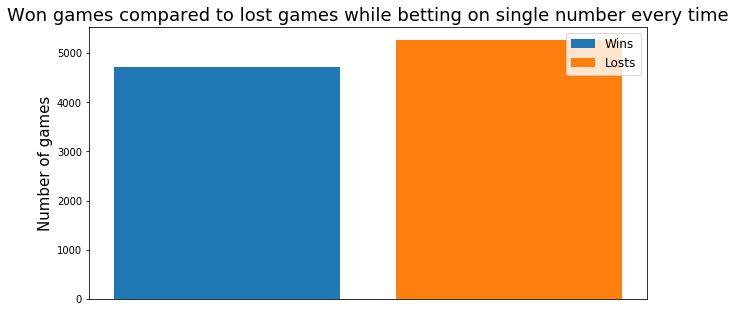

In [21]:
plt.figure(figsize=(20, 10))

# Plotting each of the 6 plots
balance_through_game=[]
always_bet_four()
plt.subplot(2,3,1)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
always_bet_four()
plt.subplot(2,3,2)
plt.title("Plots of balance throughout game betting only on four", fontsize = 25)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
always_bet_four()
plt.subplot(2,3,3)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
always_bet_four()
plt.subplot(2,3,4)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
always_bet_four()
plt.subplot(2,3,5)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
always_bet_four()
plt.subplot(2,3,6)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

plt.show()


# Plots the histogram
num_of_games = 10000
win_lose_ratio=[]
for i in range(0, num_of_games):
    always_bet_four()
    
counts = Counter(win_lose_ratio)
wins = counts["win"]
loses = counts["loss"]

plt.figure(figsize = (10,5))
plt.title("Won games compared to lost games while betting on single number every time", fontsize=18)
plt.bar(0, wins, label="Wins")
plt.bar(1, loses, label="Losts")
plt.ylabel("Number of games", fontsize = 15)
plt.yticks(fontsize=10)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.legend(fontsize = 12)
plt.show()

This one really surprised me. From the plots we see that it is very unpredictable. Many times the line goes straight down, directly losing on the 50th roll, because it bets \\$2 and the function is set to play 100 games. In those cases the generator does not generate $4$ in the first 50 rolls. However if it does generate $4$ in the first 50 rolls, you win \\$72. This gives you more money and time to play until it generates the needed number again. By the plots we can conclude that we can calculate the crucial bets at the begining where you can go streight to \\$0 by the formula 

$$C=\frac{G}{B}$$

where $C$ is the number of crucial bets in the beggining, $G$ is the number of games you are going to play and $B$ is the bet you are making each time. However the big probability of not rolling the needed number (4 in this case) is still there. If we look into the histogram of wins/loses we can see that the loses outweight the wins. 

I honestly did not think that the wins are going to be that many when compared to the loses. I expected a histogram like the one on the Reversed Meridian strategy. Now after the results are generated we can clearly see that this strange and stupid at first glance strategy, actually wins in just as many cases as the most famous and used strategy- Meridian. Literaly the whole game is determined by the first $W$ rolls, while on the Meridian the danger was running into a losing strike, which can happen much later in the game. When betting on single number each time, you can run into a fatal losing streak right off the bat.

### D’Alembert strategy
Apart from being a great mathematician, mechanician, physicst, philosopher and music theorist, Jean le Rond d'Alembert is also known for his contribution in gambling strategies. He is also famous for falling a victim to the Gambler's fallacy when he argued that the probability of a coin landing heads increased for every time that it landed on tails.  More about his interesting life you can find [here](https://en.wikipedia.org/wiki/Jean_le_Rond_d%27Alembert). 

When it comes to the gambling strategy he came up with, it is very simple and easy to follow. Some people even defy it as the safest way of betting on roulette. It is based on the previously analysed Martingale strategy. This strategy as well is using the binary bets. The difference is that while you double your bet on loss while using the Martingale strategy, here you add \\$1 to your next bet. Also when you encounter a win, you don't go back to the starting bet, but you bet the the previous bet you made decreased by 1. This way the bets during a losing streak form a less aggresive progression:

$$1\to2\to3\to4\to5\to6\to7\to8\to9\to10\to11\to12\to13\to14$$

The idea behind it is that by slowly increasing the bet you will have enough money to survive a losing streak (the danger of all progressive betting strategies). As stated in [this article](https://www.roulettesites.org/strategies/dalembert/) the starting bet must not be more than 1\% of your total money. Here is an example of a game: you bet \\$1. You lose, so you bet \\$2. You bet \\$3 and you win. In that case your next bet will be \\$2.

The following function is betting using the D'Alembert strategy. It bets every time on <font color='red'>red</font>. The starting bet is \\$1, which is the recomended bet.  After it you can see a plot of 100 games as well as a comparison of the wins and loses in 10000 games.

In [22]:
balance_through_game=[]  # List containing the balance throughout the game
win_lose_ratio=[]  # List containing if the game is a win or lose. Used in the histogram of many games

def dalembert_strategy(number_of_games=100, balance=100, bet_amount=1):
    """
    This function always bets on red. 
    On loss it adds 1 to the next bet. 
    On win it decreases the next bet by 1, until it has reached the starting bet.
    This strategy is knows as D'alembert.
    """
    starting_money = balance  # This variable is used later on to determin if the is win or not
    starting_bet = bet_amount  # This variable keeps the first bet. Used later to make sure you can't bet less than it
    current_bet = bet_amount  # This variable contains the bet that is need to be made throughout the whole game

    for i in range(0, number_of_games):  # Playing as many games as asigned in the function properties
        roll = random.choice(list(numbers.keys()))   # Generating a random number
        bet = "red"   # Assigning the color to bet on

        if balance <= current_bet:  # This makes sure you cant end up on negative balance. If your balance
            current_bet = balance   # is lower than the bet you have to make, it bets everything you have left

        if numbers[roll][0] == bet:  # If you win
            balance += current_bet
            balance_through_game.append(balance)  # Adding the current balance to the list used for plotting the data
            if current_bet <= starting_bet:  # Makes sure you can't bet lower than your starting bet
                pass
            else:
                current_bet -= 1
        else: #If you lose
            balance -= current_bet
            current_bet += 1
            balance_through_game.append(balance)  # Adding the current balance to the list used for plotting the data
            if balance <= 0:  # Stops the game if the balance is 0 or lower
                balance_through_game.append(balance)  # Adding the current balance to the list used for plotting the data
                break

    if starting_money >= balance:  # Counts the wins and loses
        win_lose_ratio.append("loss")
    else:
        win_lose_ratio.append("win")

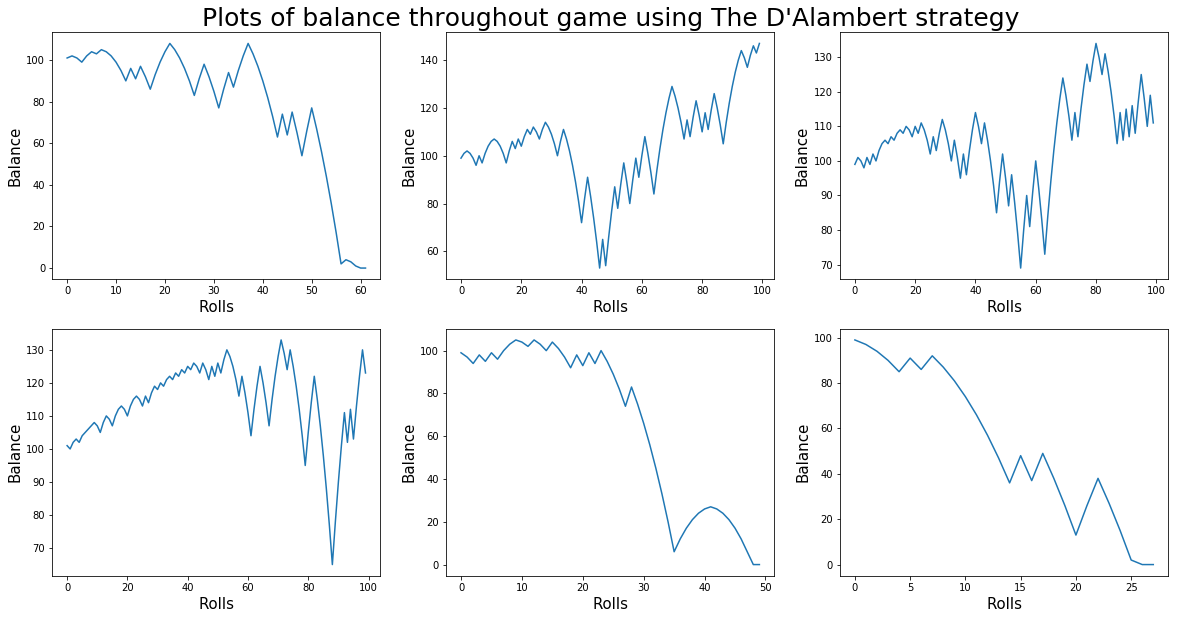

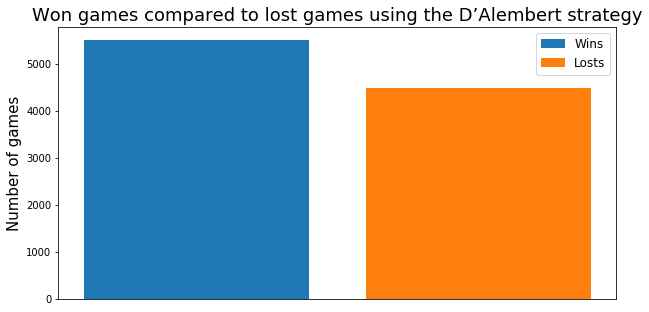

In [23]:
plt.figure(figsize=(20, 10))

# Plotting each of the 6 plots
balance_through_game=[]
dalembert_strategy()
plt.subplot(2,3,1)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy()
plt.subplot(2,3,2)
plt.title("Plots of balance throughout game using The D'Alambert strategy", fontsize = 25)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy()
plt.subplot(2,3,3)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy()
plt.subplot(2,3,4)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy()
plt.subplot(2,3,5)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy()
plt.subplot(2,3,6)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

plt.show()


# Plotting the histogram
num_of_games = 10000
win_lose_ratio=[]
for i in range(0, num_of_games):
    dalembert_strategy()
    
counts = Counter(win_lose_ratio)
wins = counts["win"]
loses = counts["loss"]

plt.figure(figsize = (10,5))
plt.title("Won games compared to lost games using the D’Alembert strategy", fontsize=18)
plt.bar(0, wins, label="Wins")
plt.bar(1, loses, label="Losts")
plt.ylabel("Number of games", fontsize = 15)
plt.yticks(fontsize=10)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.legend(fontsize = 12)
plt.show()

Those types of strategies in which you increase your bet slowly on lose and decrease it slowly on win are known to be safer then the aggressive betting used in the Martingale strategy. As you can see on the histogram the wins even outweight the loses. Don't get too excited, tho.  If you look at the plots, the wins are very small. They might be more than the loses, but  If you look at the Martingale plots you will see that they go much higher than the D’Alembert. So on the one hand you have more risky game with big wins while on the other hand you have much safer game with very small wins. In order to achieve wins as big as the Martingale strategy you have to play more games.
Lets see what happens when we increase the number of played games to 250.

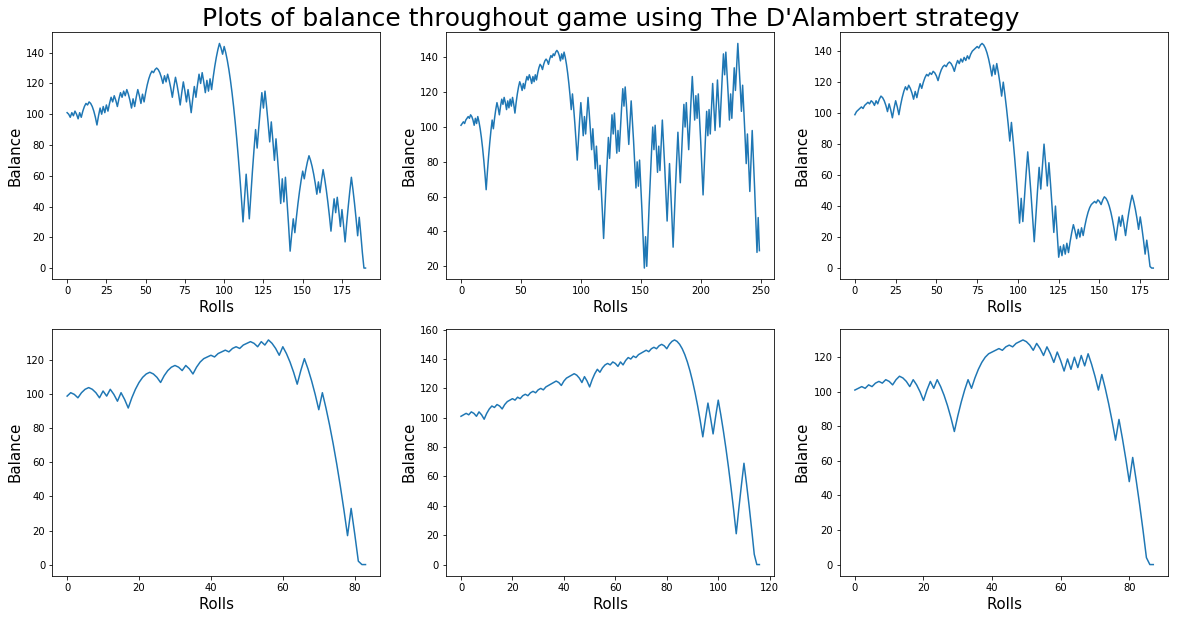

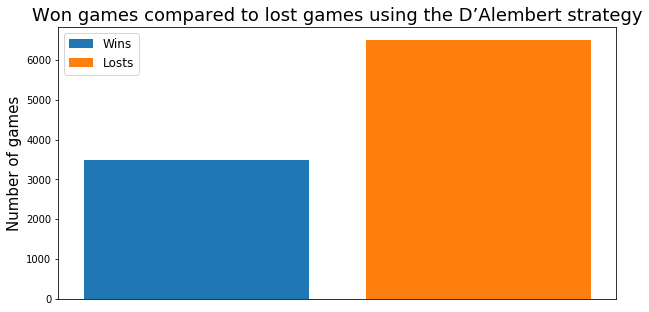

In [24]:
plt.figure(figsize=(20, 10))

# Plotting each of the 6 plots
balance_through_game=[]
dalembert_strategy(number_of_games=250)
plt.subplot(2,3,1)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy(number_of_games=250)
plt.subplot(2,3,2)
plt.title("Plots of balance throughout game using The D'Alambert strategy", fontsize = 25)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy(number_of_games=250)
plt.subplot(2,3,3)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy(number_of_games=250)
plt.subplot(2,3,4)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy(number_of_games=250)
plt.subplot(2,3,5)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

balance_through_game=[]
dalembert_strategy(number_of_games=250)
plt.subplot(2,3,6)
plt.xlabel("Rolls", fontsize=15)
plt.ylabel("Balance", fontsize = 15)
plt.plot(balance_through_game)

plt.show()

# Plotting the histogram
num_of_games = 10000
win_lose_ratio=[]
for i in range(0, num_of_games):
    dalembert_strategy(number_of_games=250)
    
counts = Counter(win_lose_ratio)
wins = counts["win"]
loses = counts["loss"]

plt.figure(figsize = (10,5))
plt.title("Won games compared to lost games using the D’Alembert strategy", fontsize=18)
plt.bar(0, wins, label="Wins")
plt.bar(1, loses, label="Losts")
plt.ylabel("Number of games", fontsize = 15)
plt.yticks(fontsize=10)
plt.tick_params(
    axis='x',          
    which='both',      
    bottom=False,      
    top=False,         
    labelbottom=False) 

plt.legend(fontsize = 12)
plt.show()

As you can see if a plot is winning it can go as high as the Martingale. But look at the histogram. This causes the win-rate to drop significantly. In order to achieve as big wins as the Martingale you need to play more games. And playing more games cause the probability for win to drop more.

If we compare the D’Alembert to the Martingale we can see that to win $x$ amount of money, the D’Alembert win-rate is lower than the Martingale. In roulette in general if something is taking more games to happen your chances are only going to drop. This is a perfect example of that.

Using this strategy you can only win small amouns of money. In order to have big wins you need to play more, which lowers your chances drop significantly.

### Other less popular strategies explained briefly
There are countless strategies out there. You can even make some up on your own. The point of this project was to analyse the more popular ones. Here are some less popular, briefly explained and analysed:

**The Fibonacci strategy** - The fibonacci number sequence is probably the most famous number sequence. Each number is the sum of the two numbers before it. Here you can see the formula that forms the fibonacci sequence, as well as some of the first numbers in it. [This article](http://mathworld.wolfram.com/FibonacciNumber.html) shows many of it's properties.

$$F_n=F_{n-1}+F_{n-2}$$

$$1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711$$

The strategy based on this sequence is also used for binary bets only. On lose you bet the next number in the sequence on the next bet. If you win, you go back 2 numbers in the sequence. Here is an example to understand it better: You bet \\$1 and you lose it. On the next bet you bet \\$1 and you lose it again. Next bet is \\$2 but you lose it again. You bet $3 on the next one and win it. The following bet goes 2 numbers back in the sequence, so it is \\$1 again. By the fact that this strategy also increases and decreases the bet you make slowly, **the results are absolutely the same as the D’Alembert strategy**. You can read more about this strategy [here](https://www.roulettesites.org/strategies/fibonacci/)

**The Labouchere strategy** - This strategy is much more complex. First of all you have to decide how much you want to win. In the example below I used \\$10. Now write down a sequence of numbers, adding up to the amount of money you want to win. In our case this can be done in several ways. Here are some of them:

$$1-1-1-1-1-1-1-1-1-1$$
$$1-1-1-2-2-2-1$$

We will use the first one as an example. From now on there are 3 rules to follow in order to execute this strategy:
    1. Each bet you determine the amount of the bet by adding up the **first and the last** number in the 
    sequence you wrote down earlier.
    2. When you win remove the first and the last numbers from the sequence.
    3. When you lose add a new number on the right side of the sequence, equal to the amount you lost.
    
The goal is to remove all the numbers from the sequence. If you do that, you have doubled your money. Here is the example from above in different scenarios. We use the $1$st rule to determine the next bet. In our case that is $\$1+\$1$, so we bet $\$2$ on the next bet. If we lose it the sequence will look like this: $1-1-1-1-1-1-1-1-1-1-2$ In that case our next bet must be $\$1 + \$2 = \$3$. If you didn't understand it or want to see other explanations as well, I recomment [this article](https://www.roulettesites.org/strategies/labouchere/) and [this video](https://www.roulettesites.org/strategies/labouchere/).

Apart from being strange and complicated, this strategy will not bring you any magical wins. You still lose most of the games. The only benefit you might gain by using this strategy is that it is a little better on the long run. Because on losing streak the bets are not as agressivly increased as the Martingale strategy, this strategy has pretty similar results as the D’Alembert strategy.

**The James Bond strategy** - Most "as seen on TV" products are actually thrash. Well, it goes the same for roulette strategies. When you see the most famous secret agent *007* using his own strategy, you expect it to be very good. Lets take a look at it. You make 3 bets:

    1. $14 on high numbers (19-36)
2. $5 on the line bet 13-14-15-16-17-18
    3. $1 on 0
    
As we already proved mathematicly in this project, the probability for winning <font color='red'>red</font>/black, even/odd, low/high are absolutely the same - $48,60\%$. Also the probability for any other line bet is absolutely the same as the one used in this strategy. We also prooved that the probability of rolling a <font color='green'>0</font> is absolutely the same as any other number - $2,70\%$. So if you decide to use this strategy you can change the bets Mr.Bond makes, because mathematicly the probability is the same as any other bet in it's category. 

So if you bet like this, there will be 25 numbers where you win and 12 where you lose. Here are the possible outcomes:

    1. If the ball lands on a high number (19-36) you win $8
2. If the ball lands on (13-18) you win $10
    3. If the ball lands on 0, you win $16
4. If the ball lands on (1-12), you lose $20

Well, maybe agent *007* has a degree in mathematics? Not exactly. If we do the math ourselves we will see that the probability for rolling a <font color='green'>0</font> is 2,70\%, for a number in the interval (13-18) the probability is 16,20\%, for a high number (19-36) is 48,60\% and for rolling a number in the interval (1-12) it is 32,43\%. Eventhough you will win more, your wins will be small. Even if you start with some wins at the beggining of the game, with time the loses will become bigger and bigger, to the point where you will wish you saved up for an *Aston Martin* in stead of losing money because you didn't do the math before you entered the casino. In the long run this strategy will also bring you only loses.

## Conclusions
We started with this and we will end with this. **Casinos aren't stupid.** Nobody is willing to give you free money. Even if you had known before reading this document that the casino always has better chances of wining at roulette, now you know why is that as it is. You were shown both the mathematical and logical explanation of why it is a bad idea to walk into a casino. 

No matter which of the shown strategies you use or you bet on random, you cannot get a higher probability of winning than the casino. The only thing a strategy can help you with is having smaller loses and having a possible way to overcome the losses before the end of a fatal losing streak. 

Strategies with small increases in the bet on loss like the ***D’Alembert*** will help you not lose as much, but also using them will cause you to make only small and temporary wins. It is a low-risk - low-reward situation. On the other hand using strategy like the ***Reversed Martingale*** can win you very much if you encounter a so called winning streak (upwards pointing spike on the plot) But if you don't encounter one, or get greedy and continue to bet while on one, you will eventually and slowly lose. Other strategies like the normal ***Martingale*** where you increase your bets so fast are more prone to losing on a losing streak. When you double your bet on each loss, you will run out of money to double the bet much faster than on the ***D’Alembert*** strateg. These strategies are very agressive, but with the high risk comes the high reward. 

It comes up to you to decide how you want to play - fast and aggresive (Reversed Martingale), slow but safer (D’Alembert) or something on the middle (Normal Martingale). Now you know for what each strategy is good for. You also know that you cann

At the end of the day no matter which strategy you decide to use, they all will lead you to a balance equal to the <font color='green'>green</font> number on the rorulette. You just cannot win in the long run. We proved that matchematicly. It's up to you to decide if you are willing to ignore the laws of math.

*If you ask me which strategy to use when playing roulette I have a absolute favourite - don't play at the first place.*

## Refferances
[Roulette Wheel picture](https://www.vexels.com/png-svg/preview/151205/roulette-wheel-icon)

[Roulette Table picture](https://www.vectorstock.com/royalty-free-vector/casino-roulette-table-template-vector-20630721)

["Newtonian Casino" by Thomas Bass (1991)](https://www.amazon.com/Newtonian-Casino-Thomas-Bass/dp/0140145931)

[Roulette Wheel Bias Analysis Techniques article](https://www.roulettephysics.com/roulette-wheel-bias/)

["An Investigation into Labouchère’s Betting System to Improve Odds of Favorable Outcomes to
Generate a Positive Externality Empirically" by Jake Billings and Sebastian Del Barco](https://arxiv.org/pdf/1707.00529.pdf)

["Roulette"](http://probability.infarom.ro/roulette.html)

["Monotonous betting strategies in warped casinos" by George Barmpalias, Nan Fang Andrew, Lewis-Pye April 18, 2019](https://arxiv.org/pdf/1807.04635.pdf)

[Law of large numbers - Wikipedia](https://en.wikipedia.org/wiki/Law_of_large_numbers)

[Gambler's fallacy - Wikipedia](https://en.wikipedia.org/wiki/Gambler%27s_fallacy)

[The Martingale System – Overcoming the Odds?](https://www.roulettesites.org/strategies/martingale/)

[The Reverse Martingale System – Parlay Your Winnings](https://www.roulettesites.org/strategies/reverse-martingale/)

[Jean le Rond d'Alembert - Wikipedia](https://en.wikipedia.org/wiki/Jean_le_Rond_d%27Alembert)

[The D’Alembert System – History and Analysis](https://www.roulettesites.org/strategies/dalembert/)

[Fibonacci Number - WolframMathWorld](http://mathworld.wolfram.com/FibonacciNumber.html)

[The Fibonacci System – A Low-Risk Strategy for Roulette](https://www.roulettesites.org/strategies/fibonacci/)

[The Labouchere System – Analysis & Review](https://www.roulettesites.org/strategies/labouchere/)